# Chapter - 3 exerciese

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf

## 8. This question involves the use of simple linear regression on the Auto  data set.
### (a) Use the lm() function to perform a simple linear regression with  mpg as the response and horsepower as the predictor. Use the  summary() function to print the results.

In [4]:
auto = pd.read_csv(r'./data/Auto.csv')
print(auto.shape)
print("---------------")
auto.head()

(397, 9)
---------------


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

#### horsepower is of type object, it needs to be int or float to be able to fit for regression

In [6]:
auto['horsepower'] = auto['horsepower'].replace('?',np.nan)
auto.dropna(inplace = True)
auto['horsepower'] = auto['horsepower'].astype('float')

auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [7]:
result = smf.ols('mpg ~ horsepower',data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           7.03e-81
Time:                        22:46:48   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

### i. Is there a relationship between the predictor and the response?

#### Since there is a non negative ceofficient, there is a realtionship between predictor and response

### ii. How strong is the relationship between the predictor and the response?

#### we can meauser the overall fit by R2 value, since R2 value is 0.60, we say that 60% of invariability is explained by the predictor

### iii. Is the relationship between the predictor and the response positive or negative?
 

#### the value of the coefficient is -0.1578, hence the relationship is negative.

### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?


In [8]:
# i am not sure about how to find prediction with a given confidence. For this question i am using a model, to train
# and then predict an answer
model = LinearRegression()
model.fit(auto['horsepower'].to_frame(),auto['mpg'])
model.predict(pd.Series([98]).to_frame())

array([24.46707715])

#### we are getting the answer as 24.46 ,but we can't be sure about the confidence in the prediction and the resulting range of the confidence

### (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

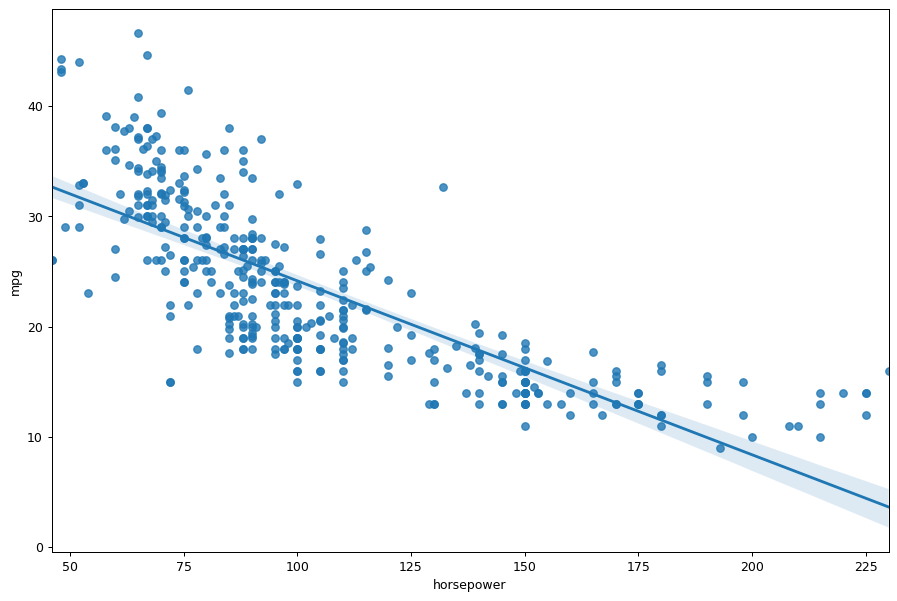

In [12]:
plt.figure(figsize = (12,8), dpi=90)
sns.regplot(x=auto['horsepower'], y=auto['mpg'])
# sns.regplot(x=auto['horsepower'], y=auto['mpg'], color="red")

### (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

#### Diagnostic plots cnotains four types of plot, residual vs fitted,normal q-q, scale-location,residuals vs leverage
#### Here i am plotting the first two graphs
#### one can refer to the link below to get more information - 

Text(0.5, 1.0, 'Residual Plot')

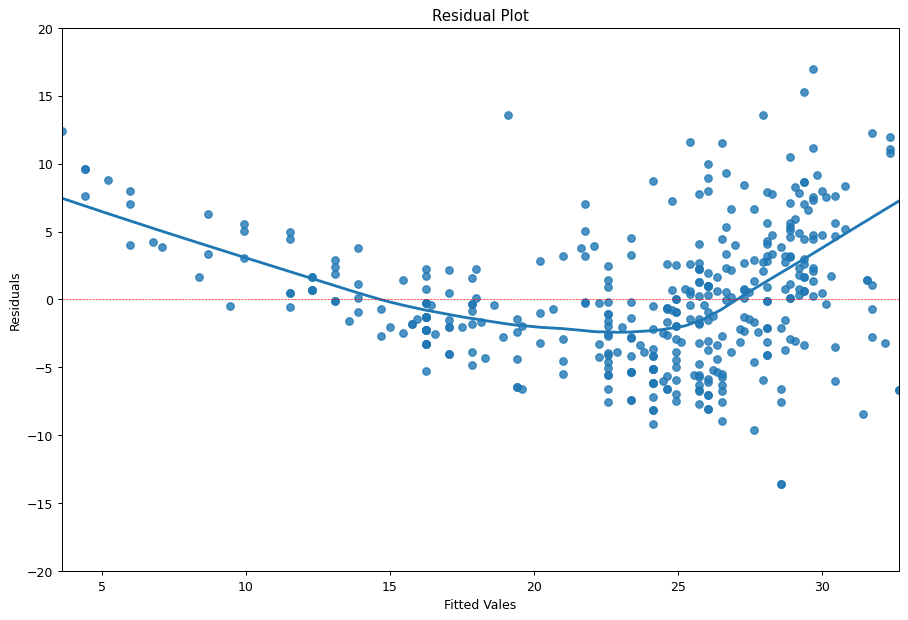

In [14]:
# dist of residuals
plt.figure(figsize = (12,8), dpi=90)
plt.ylim(-20,20)
sns.regplot(x=result.fittedvalues, y=result.resid, lowess=True)
# plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'red')
plt.xlabel('Fitted Vales')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### the distribution has some kind of pattern

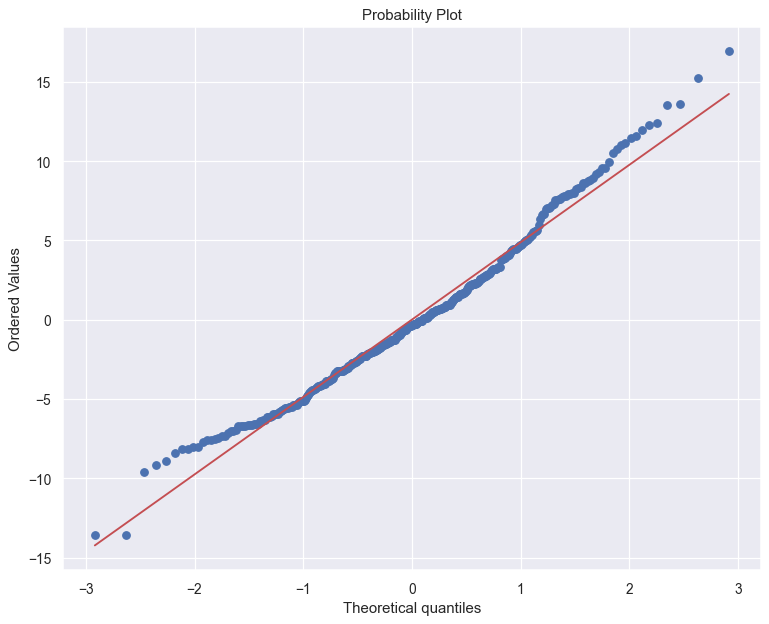

In [24]:
# Q-Q plot
sns.set(rc={'figure.figsize':(10,8), "figure.dpi":90})
ax = stats.probplot(result.resid, dist='norm', plot=plt)

#### the q-q polt is close to ideal.

## 9. This question involves the use of multiple linear regression on the Auto data set.

In [16]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

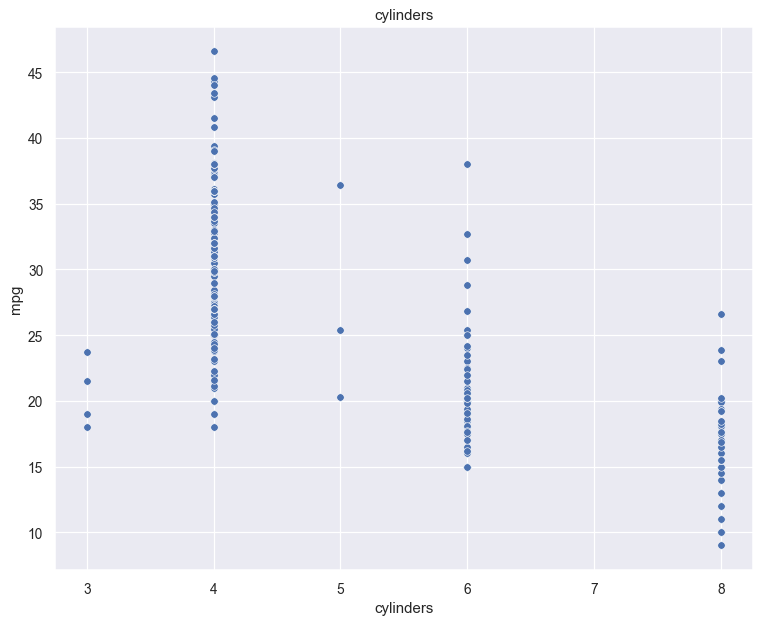

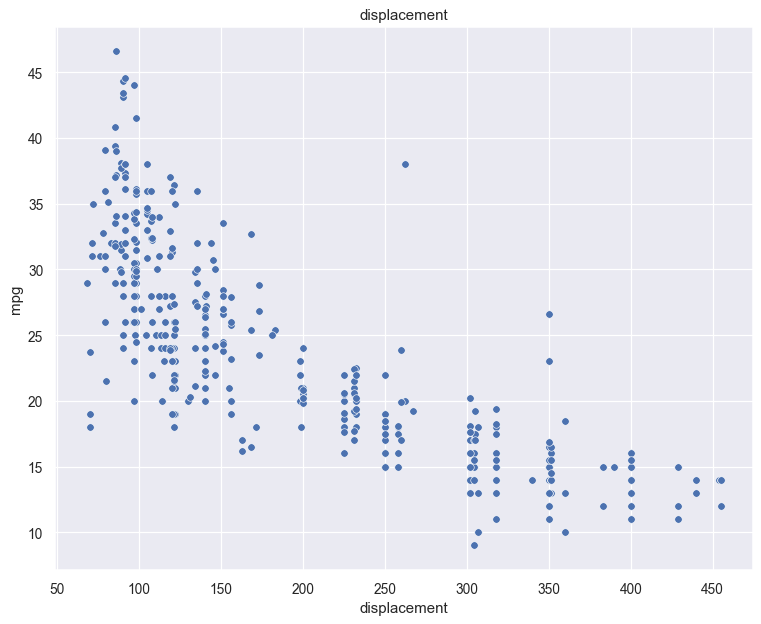

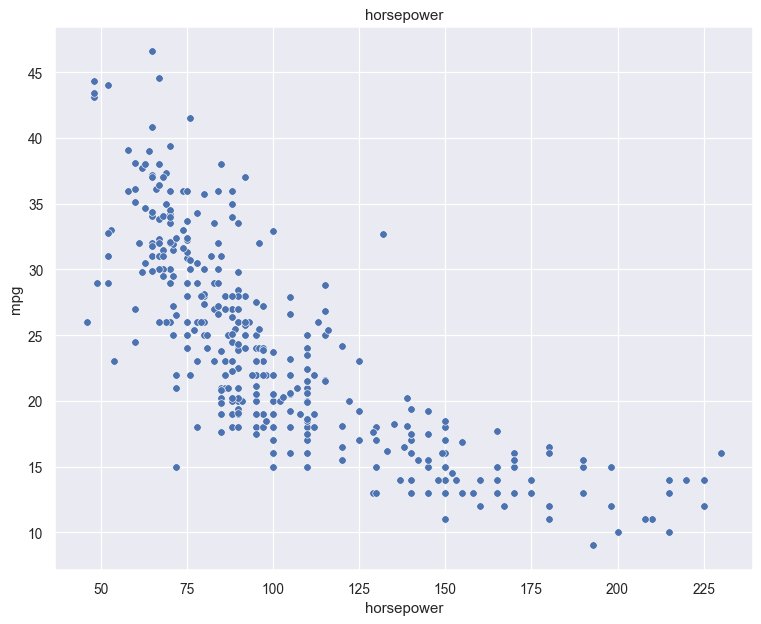

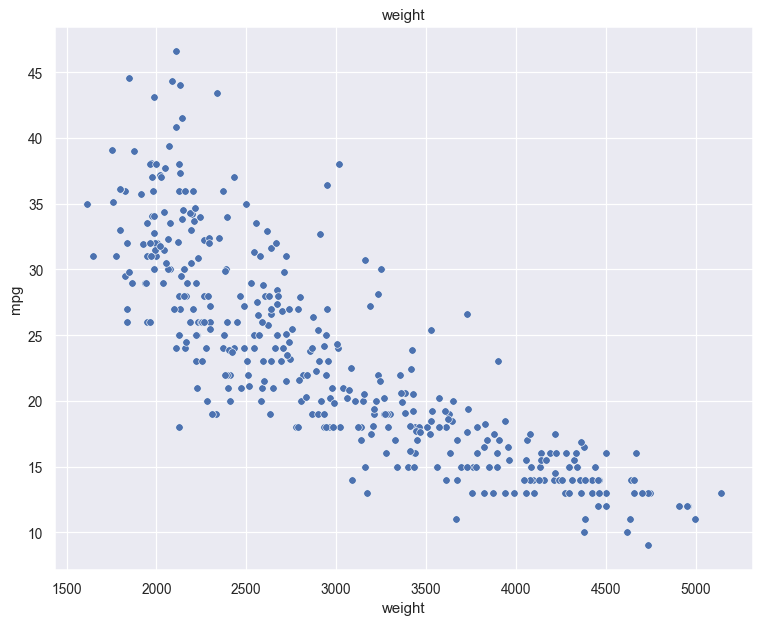

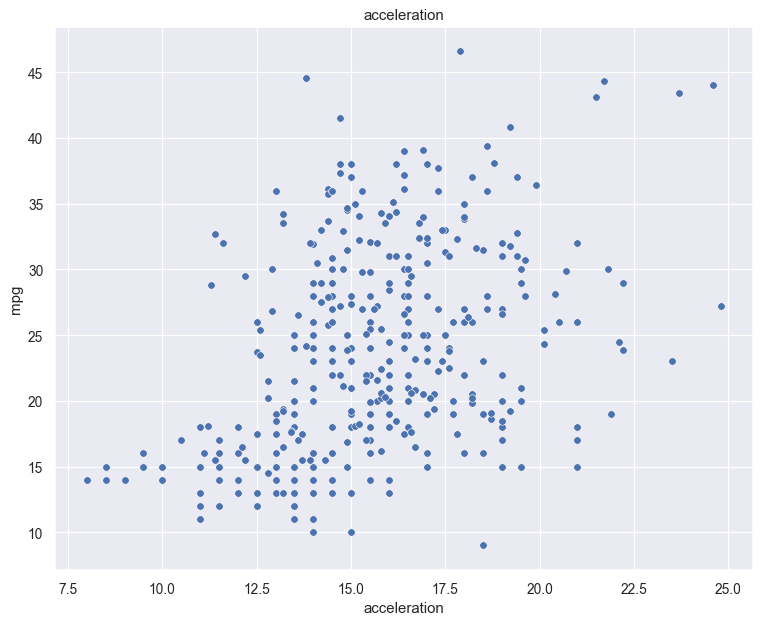

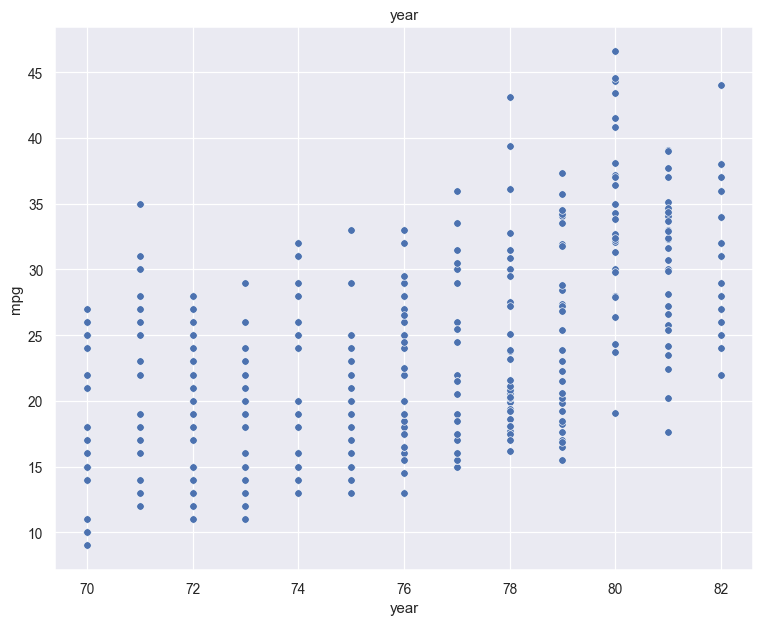

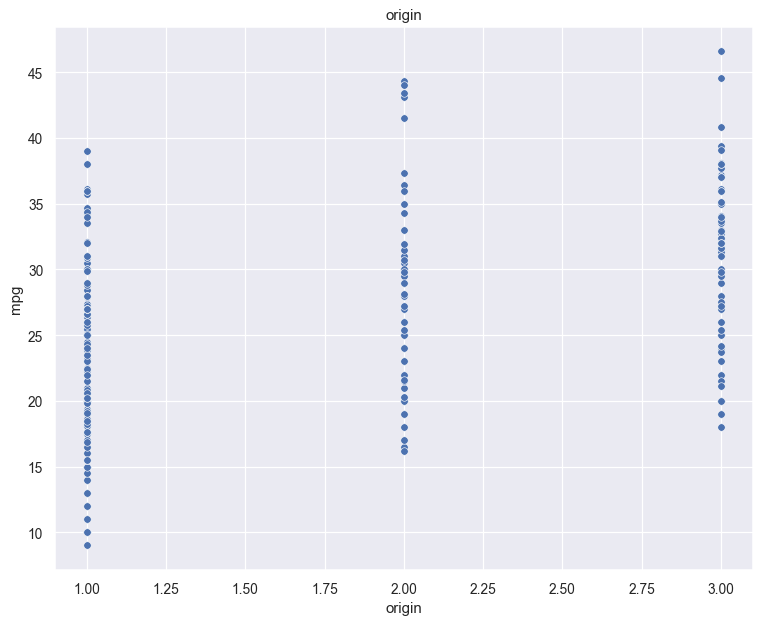

In [22]:
for col in auto.iloc[:,1:8].columns:
  sns.set(rc={'figure.figsize':(10,8), "figure.dpi":90})
  sns.scatterplot(x=auto[col], y=auto['mpg'])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('mpg')
  plt.show()

### (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, cor() which is qualitative.

In [19]:
auto.iloc[:,:-1].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<AxesSubplot:>

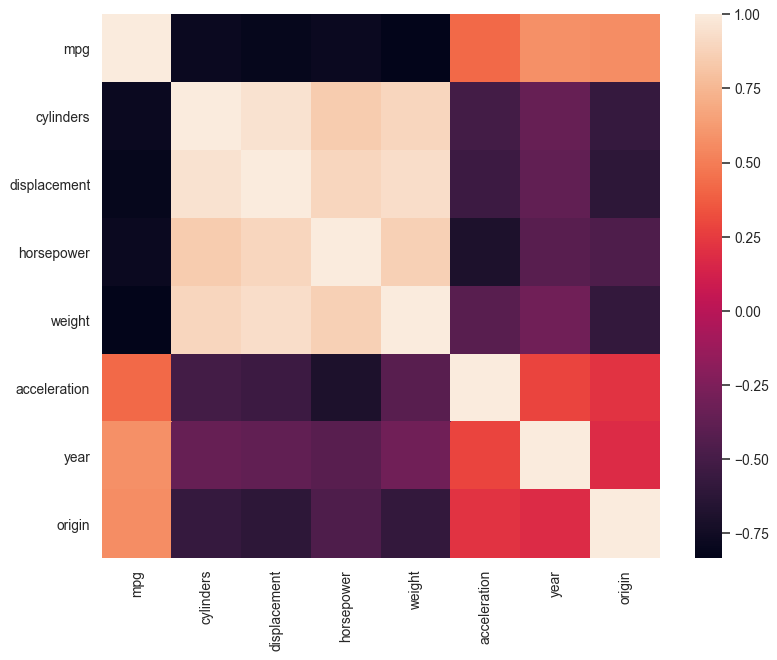

In [23]:
sns.set(rc={'figure.figsize':(10,8), "figure.dpi":90})
sns.heatmap(auto.iloc[:,:-1].corr())

### (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output.

In [25]:
predictors = ' + '.join(auto.columns.difference(['name','mpg']))
result = smf.ols('mpg ~ {}'.format(predictors),data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          2.04e-139
Time:                        23:03:36   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

### i. Is there a relationship between the predictors and the response?

#### since we are having non zero ceoffiencts, there is a relationship between the predictors and response.
#### also the value of f statistic is quite high, which supports the claim.

### ii. Which predictors appear to have a statistically significant relationship to the response?

#### Origin,weight, year have very significan p value of 0, displacement also has a very low p value.

### iii. What does the coefficient for the year variable suggest?

#### Coefficient of year is 0.7508. It means that if we increase the value of year by i unit, kepping all other predictors fixec,
#### we would expect 0.7508 increase in the response.

### d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

Text(0.5, 1.0, 'Residual Plot')

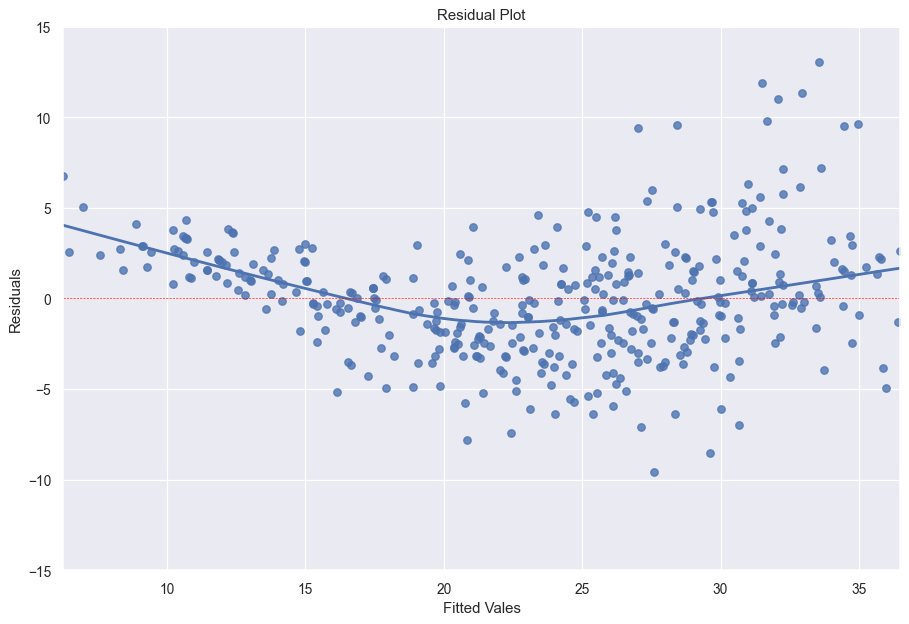

In [27]:
# diagnotis plot
# dist of residuals
plt.figure(figsize = (12,8), dpi=90)
plt.ylim(-15,15)
sns.regplot(x=result.fittedvalues, y=result.resid, lowess=True)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'red')
plt.xlabel('Fitted Vales')
plt.ylabel('Residuals')
plt.title('Residual Plot')

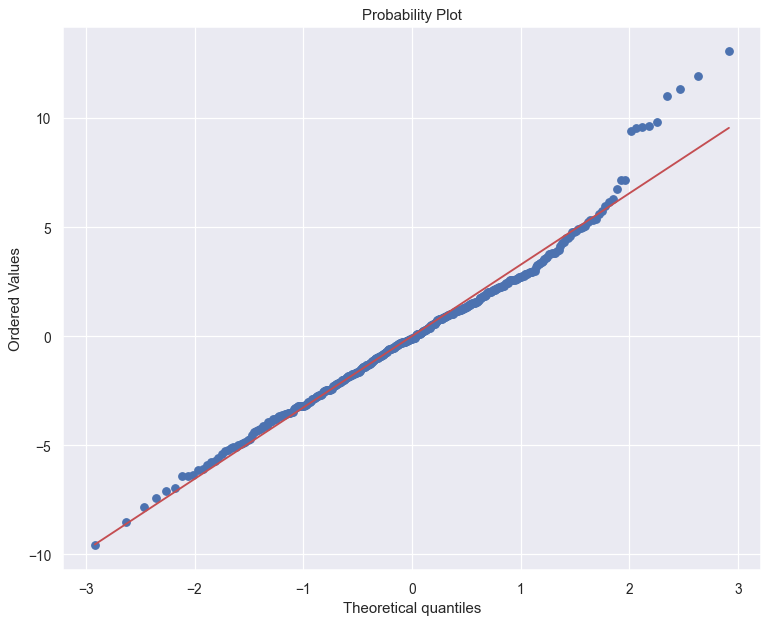

In [28]:
# Q-Q plot
ax = stats.probplot(result.resid, dist='norm', plot=plt)

#### in both of the graphs we can see some points in the uppwe right corner behaving as outliers
#### Q-Q plot is very colse to  the ideal, and the residuals distribution plot is also accetable

### (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [29]:
predictors = ' + '.join(auto.columns.difference(['name','mpg']))
result = smf.ols('mpg ~ {} + horsepower*cylinders + horsepower*year'.format(predictors),data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     283.1
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          5.43e-163
Time:                        23:06:56   Log-Likelihood:                -961.89
No. Observations:                 392   AIC:                             1944.
Df Residuals:                     382   BIC:                             1983.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -40.8773 

#### we have added two tersms, horsepower*cyllinder and horsepower*year, for both of these the p values are significant
#### Adding the interaction terms has resulted in the increase of R2 value from 82.1 to 87.0

### (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [30]:
predictors = ' + '.join(auto.columns.difference(['name','mpg']))
result = smf.ols('mpg ~ {} + horsepower*cylinders + np.power(horsepower,2)'.format(predictors),data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          6.47e-159
Time:                        23:07:32   Log-Likelihood:                -971.55
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     382   BIC:                             2003.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#### we saw in the chapter how the scatterplot between horsepower and mpg hinted a non linear realtionship
#### by adding a new term which is horsepower**2, we saw an increase in R2 value increase from 82.1 to 86.3

## 10. This question should be answered using the Carseats data set

In [31]:
data = pd.read_csv(r'./data/Carseats.csv')
print(data.shape)
print("------------------")
data.head()

(400, 11)
------------------


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [32]:
shelveloc_mapping = {'Bad':0,'Good':1,'Medium':2}
yes_no_mapping = {'Yes':1,'No':0}
data['ShelveLoc'] = data['ShelveLoc'].map(shelveloc_mapping)
data['Urban'] = data['Urban'].map(yes_no_mapping)
data['US'] = data['US'].map(yes_no_mapping)

data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [33]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

#### we now a complete quantative data

### (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [34]:
result = smf.ols('Sales ~ Price + Urban + US',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           2.39e-23
Time:                        23:10:33   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

#### from the coeffiecents we can see that  the Price and Urban are negatively related to Sales, and US is positively related
#### Looking at the p values, Price and Us have significant p-values, but Urban has a very high p values ,and its 
#### better that we exclude it from the model

### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

### (d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

#### although all the predictors are having coefficients non zero, but since Urban has a high value, we will not use it as a predictor

### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [36]:
result = smf.ols('Sales ~ Price + US',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           2.66e-24
Time:                        23:12:42   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

### (f) How well do the models in (a) and (e) fit the data?

#### Removing the Urban from the first model, there is no change in the R2 value in the second model. Through this we can also 
#### conclude that Urban has no say in the prediction of the response, hence its better to use the model with two predictors

### (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

#### for 95% of confidence value we calculate the range of x +/- 2*stddev(x)

In [38]:
coeff_price = -0.0545
std_price = 0.005
range_price = [coeff_price - 2*std_price,coeff_price + 2*std_price]

coeff_US = 1.1996
std_US = 0.258
range_US = [coeff_US - 2*std_US,coeff_US + 2*std_US]

print('With 95% confidence the range for Price coefficient is ',range_price)
print('With 95% confidence the range for US coefficent is ',range_US)

With 95% confidence the range for Price coefficient is  [-0.0645, -0.0445]
With 95% confidence the range for US coefficent is  [0.6836, 1.7156]


### (h) Is there evidence of outliers or high leverage observations in the model from (e)?

Text(0.5, 1.0, 'Residual Plot')

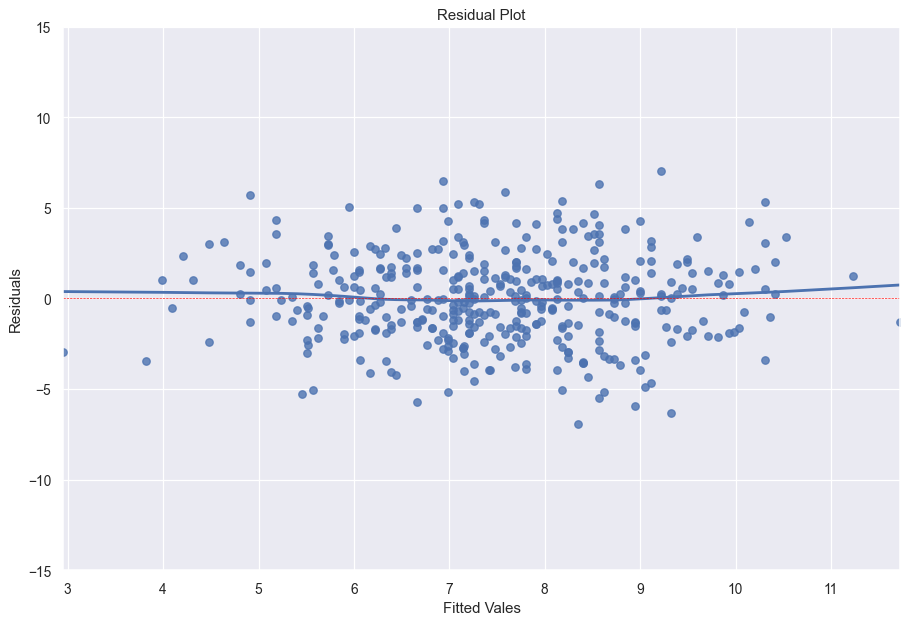

In [41]:
# dist of residuals
plt.figure(figsize = (12,8), dpi=90)
plt.ylim(-15,15)
sns.regplot(x=result.fittedvalues, y=result.resid, lowess=True)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'red')
plt.xlabel('Fitted Vales')
plt.ylabel('Residuals')
plt.title('Residual Plot')

#### from the graph, we can see its a good fit, and there is no pattern

## 11. In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [42]:
np.random.seed(1)
X = np.random.normal(size = 100)
Y = 2*X + np.random.normal(size = 100)
data = pd.DataFrame({'X':X,'y':Y})

data.head()

,X,y
0,1.624345,2.801562
1,-0.611756,0.000995
2,-0.528172,-0.652852
3,-1.072969,-1.552359
4,0.865408,0.635903


### (a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0.

In [43]:
result = smf.ols('y~X + 0',data = data).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Fri, 26 Mar 2021   Prob (F-statistic):                    3.46e-36
Time:                        23:16:15   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### coefficient estimate is 2.1067, std_error is 0.106,value of t-statistic is 19.792. P value is significant.
#### Hence, we reject null hypothesis, and there is a realationship between predictor and response.

### (b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0.

In [44]:
result = smf.ols('X~y + 0',data = data).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      X   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Fri, 26 Mar 2021   Prob (F-statistic):                    3.46e-36
Time:                        23:16:49   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Coef estimate is 0.3789, std_error is 0.019, value of t statistic is 19.792, and p value is significant.

### (c) What is the relationship between the results obtained in (a) and (b)?

#### Alhtought the coeff estimates and their std_errors were different, the value of t - statistic was sama in both the cases

### (d)  Show algebraically, and confirm numerically in R, that the t-statistic can be written as
(
√n − 1)
n
i=1 xiyi
(

n
i=1 x2
i )(
n
i=1 y2
i ) − (

n
i=1 xiyi )2

###  (e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.

#### The formula of t - statistic is symmetric for x and y, therefore if we interchange the values of x and y 
#### we will get the same value of t - statistic

### (f) In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.

In [47]:
result = smf.ols('y~X',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           5.39e-36
Time:                        23:21:34   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1470      0.094      1.564      0.1

In [48]:
result = smf.ols('X~y',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           5.39e-36
Time:                        23:21:44   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0440      0.040     -1.090      0.2

#### t value is same  =19.783

## 12. This problem involves simple linear regression without an intercept

### (a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

### (b) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [49]:
np.random.seed(0)

X = np.random.normal(size = 100)
Y = 2*X + np.random.normal(size = 100)
data = pd.DataFrame({'X':X,'y':Y})

lin_x_on_y = LinearRegression(fit_intercept=False)
lin_x_on_y.fit(data['X'].to_frame(),data['y'])
coef_1 = lin_x_on_y.coef_

lin_y_on_x = LinearRegression(fit_intercept= False)
lin_y_on_x.fit(data['y'].to_frame(),data['X'])
coef_2 = lin_y_on_x.coef_

print('coef_1 is {}, coef_2 is {}'.format(coef_1,coef_2))

coef_1 is [2.11910764], coef_2 is [0.38298135]


### c) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X

In [50]:
# we need to choose x and y in such a way that their variabce is same. 
X = np.random.normal(size = 100)
y = np.random.permutation(X)
data = pd.DataFrame({'X':X,'y':y})

lin_x_on_y = LinearRegression(fit_intercept=False)
lin_x_on_y.fit(data['X'].to_frame(),data['y'])
coef_1 = lin_x_on_y.coef_

lin_y_on_x = LinearRegression(fit_intercept= False)
lin_y_on_x.fit(data['y'].to_frame(),data['X'])
coef_2 = lin_y_on_x.coef_

print('coef_1 is {}, coef_2 is {}'.format(coef_1,coef_2))

coef_1 is [-0.15473722], coef_2 is [-0.15473722]


#### both the coefficients are same

## 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.

### (a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [51]:
np.random.seed(1)
X = np.random.normal(loc = 0,scale = 1,size = 100)

### (b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution

In [52]:
eps = np.random.normal(loc = 0,scale = 0.25,size = 100)

### (c) Using x and eps, generate a vector y according to the model
### Y = −1+0.5X + eps
### What is the length of the vector y? What are the values of β0 and β1 in this linear model?


In [53]:
Y = -1 + 0.5*X + eps
print('length of y is ',Y.size)
# beta0 = -1 , beta1 = 0.5

length of y is  100


### (d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.


Text(0.5, 1.0, 'Relationship b/w X and Y')

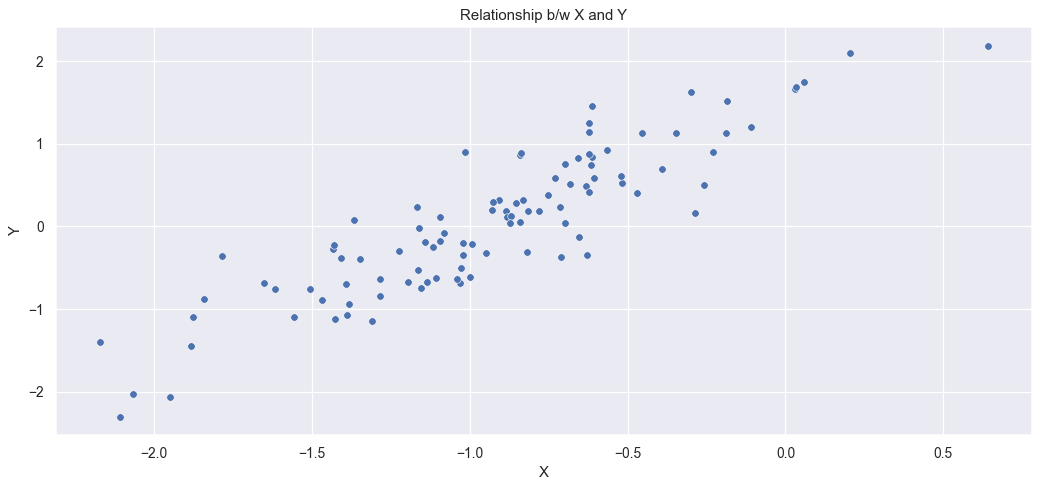

In [55]:
plt.figure(figsize = (14,6), dpi=90)
sns.scatterplot(x=Y, y=X)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relationship b/w X and Y')

### (e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [56]:
data = pd.DataFrame({'X':X,'y':Y})
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(data['X'].to_frame(),data['y'])

print('estimated beta0 is ',lin_model.intercept_)
print('estimated beta1 is ',lin_model.coef_[0])

estimated beta0 is  -0.9632466175754496
estimated beta1 is  0.5238567834127927


#### the estimated values are pretty similar to the true values
#### estimated ~ [-0.96,0.52]
#### true ~ [-1,0.5]

### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend

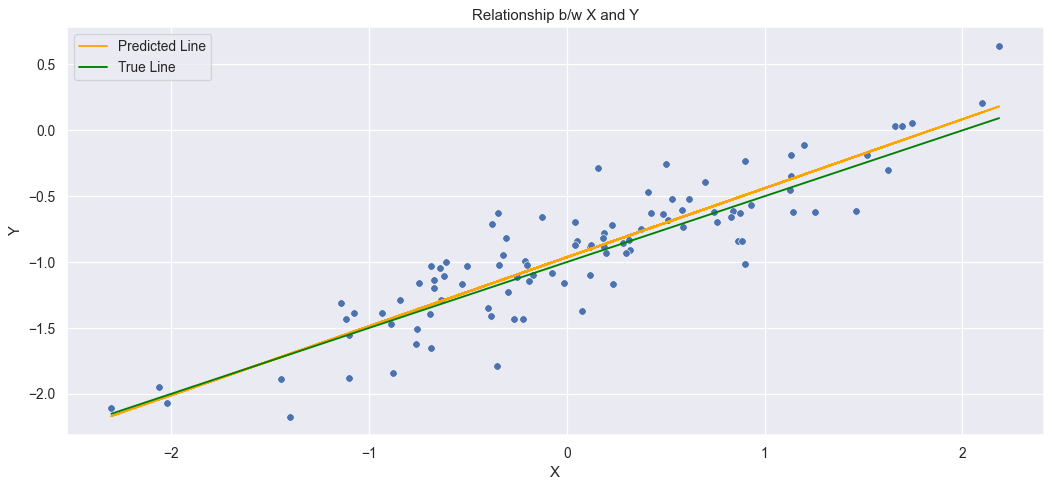

In [58]:
tmp_x = np.linspace(data['X'].min(),data['X'].max(),100)
tmp_y = -1 + 0.5*tmp_x

plt.figure(figsize = (14,6), dpi=90)
sns.scatterplot(x=X, y=Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data['X'],lin_model.predict(data['X'].to_frame()),color = 'orange',label = 'Predicted Line')
plt.title('Relationship b/w X and Y')
plt.plot(tmp_x,tmp_y,color = 'green',label = 'True Line')
plt.legend()
plt.show()

### (g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [59]:
# withoud x**2 term
result = smf.ols('y~X',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           5.39e-36
Time:                        23:27:38   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.0

In [60]:
# adding x**2 term
result = smf.ols('y~X + np.power(X,2)',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           1.32e-34
Time:                        23:27:46   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9663      0.029    -33.

#### There is no change in R2 value, showing that adding the X**2 term has not benefited in predicting y.
#### also the p value is very high(0.856), hence, we cannot reject null hypothesis, and we conclude that y is not dependent on X**2

### (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term  in (b). Describe your results.

For less noisy data - 
estimated beta0 is  -0.998529864703018
estimated beta1 is  0.5009542713365114
------------------------------


Text(0.5, 1.0, 'Data with low noise')

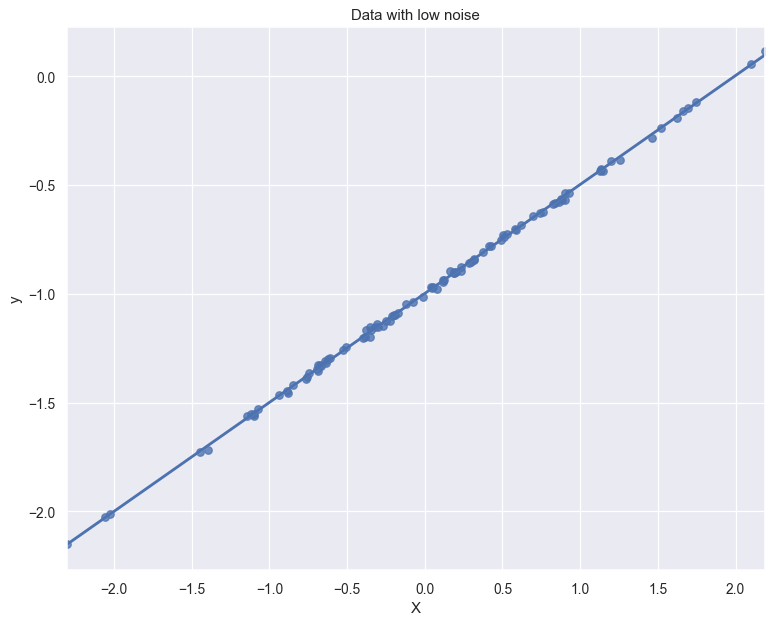

In [62]:
np.random.seed(1)
X = np.random.normal(loc = 0,scale = 1,size = 100)
eps = np.random.normal(loc = 0,scale = 0.01,size = 100)
Y = -1 + 0.5*X + eps
# beta0 = -1 , beta1 = 0.5

data = pd.DataFrame({'X':X,'y':Y})
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(data['X'].to_frame(),data['y'])

beta_0_low =lin_model.intercept_
beta_1_low = lin_model.coef_[0]

print('For less noisy data - ')
print('estimated beta0 is ',beta_0_low)
print('estimated beta1 is ',beta_1_low)
print("------------------------------")
# data with low noise
sns.regplot(x=data['X'], y=data['y'])
plt.title('Data with low noise')

In [63]:
result = smf.ols('y~X',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.237e+05
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          2.16e-166
Time:                        23:29:24   Log-Likelihood:                 326.08
No. Observations:                 100   AIC:                            -648.2
Df Residuals:                      98   BIC:                            -642.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9985      0.001  -1062.519      0.0

In [64]:
beta_0_std_low = 0.001
beta_0_range_low = [beta_0_low - 2*beta_0_std_low,beta_0_low + 2*beta_0_std_low]

beta_1_std_low = 0.001
beta_1_range_low = [beta_1_low - 2*beta_1_std_low,beta_1_low + 2*beta_1_std_low]

print('range for beta 0 for low noise data ',beta_0_range_low)
print('range for beta 1 for low noise data ',beta_1_range_low)

range for beta 0 for low noise data  [-1.0005298647030179, -0.996529864703018]
range for beta 1 for low noise data  [0.4989542713365114, 0.5029542713365114]


#### The estimated values of beta0 and beta1 are more closed to the actual value of beta0 and beta1
#### (-1,0.5) ~ (-0.998,0.500)

### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term  in (b). Describe your results.

For more noisy data - 
estimated beta0 is  -0.8529864703017983
estimated beta1 is  0.5954271336511716
---------------------------------------


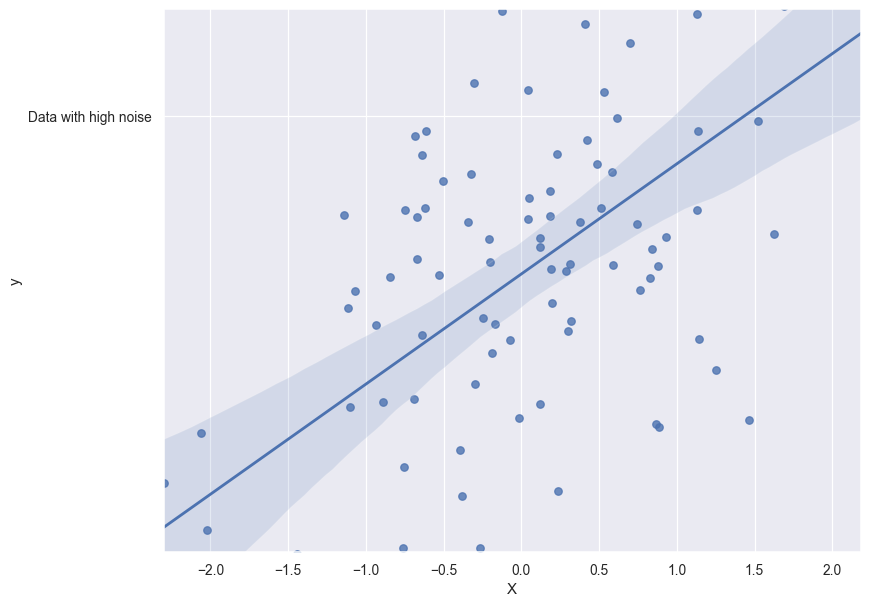

In [65]:
np.random.seed(1)
X = np.random.normal(loc = 0,scale = 1,size = 100)
eps = np.random.normal(loc = 0,scale = 1,size = 100)
Y = -1 + 0.5*X + eps
# beta0 = -1 , beta1 = 0.5

data = pd.DataFrame({'X':X,'y':Y})
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(data['X'].to_frame(),data['y'])

beta_0_high =lin_model.intercept_
beta_1_high = lin_model.coef_[0]

print('For more noisy data - ')
print('estimated beta0 is ',lin_model.intercept_)
print('estimated beta1 is ',lin_model.coef_[0])
print("---------------------------------------")
sns.regplot(x=data['X'], y=data['y'])
plt.plot('Data with high noise')
plt.show()

In [66]:
result = smf.ols('y~X',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.60
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           1.79e-07
Time:                        23:31:02   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8530      0.094     -9.076      0.0

In [67]:
beta_0_std_high = 0.094
beta_0_range_high = [beta_0_high - 2*beta_0_std_high,beta_0_high + 2*beta_0_std_high]

beta_1_std_high = 0.106
beta_1_range_high = [beta_1_high - 2*beta_1_std_high,beta_1_high + 2*beta_1_std_high]

print('range for beta 0 for high noise data ',beta_0_range_high)
print('range for beta 1 for high noise data ',beta_1_range_high)

range for beta 0 for high noise data  [-1.0409864703017984, -0.6649864703017982]
range for beta 1 for high noise data  [0.38342713365117165, 0.8074271336511716]


#### We can see as we increase the noise the estimated values of beta0 and beta1 shift far away from the real values
#### estimated = (-0.852,0.594)
#### real = (-1,0.5)

### (j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [71]:
print('range for beta 0 for low noise data ',beta_0_range_low)
print('range for beta 1 for low noise data ',beta_1_range_low)
print('\n')
print('range for beta 0 for high noise data ',beta_0_range_high)
print('range for beta 1 for high noise data ',beta_1_range_high)

range for beta 0 for low noise data  [-1.0005298647030179, -0.996529864703018]
range for beta 1 for low noise data  [0.4989542713365114, 0.5029542713365114]


range for beta 0 for high noise data  [-1.0409864703017984, -0.6649864703017982]
range for beta 1 for high noise data  [0.38342713365117165, 0.8074271336511716]


#### For high noise data, the range is way more wide as compared to the low noise data

## 14. This problem focuses on the collinearity problem

### (a) Perform the following commands in R

In [72]:
np.random.seed(5)
x1 = np.random.uniform(size = 100)
x2 = 0.5*x1 + np.random.normal(size = 100) / 10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size = 100)

### (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

          X1        X2         y
X1  1.000000  0.819369  0.662657
X2  0.819369  1.000000  0.583263
y   0.662657  0.583263  1.000000
-----------------------------


<AxesSubplot:xlabel='X1', ylabel='X2'>

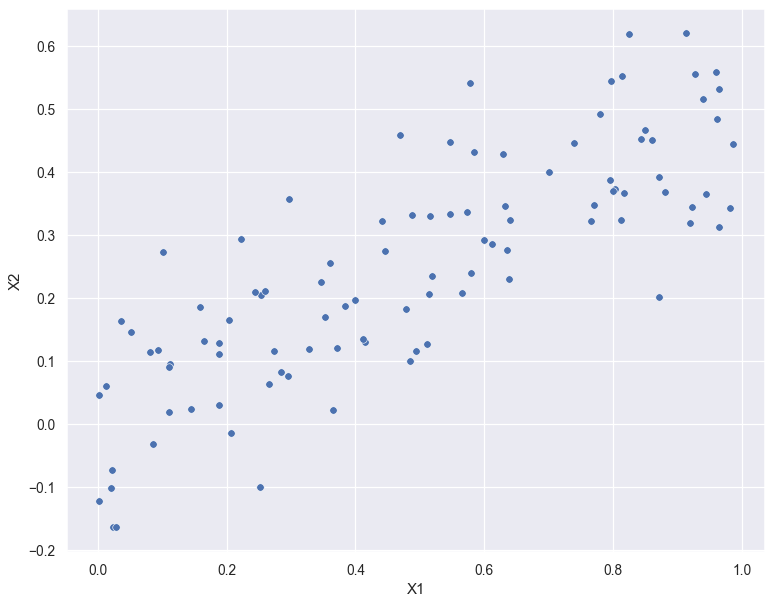

In [73]:
data = pd.DataFrame({'X1':x1,'X2':x2,'y':y})
corr = data.corr()
print(corr)
print("-----------------------------")
sns.scatterplot(x=data['X1'], y=data['X2'])

### c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [74]:
result = smf.ols('y~X1 + X2',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     38.74
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           4.31e-13
Time:                        23:34:44   Log-Likelihood:                -123.67
No. Observations:                 100   AIC:                             253.3
Df Residuals:                      97   BIC:                             261.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8158      0.162     11.231      0.0

In [75]:
tmp = pd.DataFrame({'beta0':[2,1.8158],'beta1':[2,2.0758],'beta2':[0.3,0.7584]}) 
tmp.index = ['True','Predicted']
tmp

,beta0,beta1,beta2
True,2.0000,2.0000,0.3000
Predicted,1.8158,2.0758,0.7584


#### since the predicted values for beta1  and beta2 are != 0. We reject the null hypothese for both the cases.

### (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [76]:
result = smf.ols('y~X1',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     76.72
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           5.93e-14
Time:                        23:35:26   Log-Likelihood:                -124.11
No. Observations:                 100   AIC:                             252.2
Df Residuals:                      98   BIC:                             257.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8229      0.161     11.295      0.0

#### since beta1 != 0, we reject the null hypotheses, also p value is 0.

### e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [77]:
result = smf.ols('y~X2',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     50.53
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           1.92e-10
Time:                        23:35:59   Log-Likelihood:                -132.23
No. Observations:                 100   AIC:                             268.5
Df Residuals:                      98   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1250      0.157     13.572      0.0

#### we reject the null hypothses, as coef != 0

### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

#### No, we can't say that the reults are contradicting each other. In the combined model in (c), the two predictors were 
#### highly correlated, (that's how they were created, x2 is depencdent on x), and due to this collinearity effect, the 
#### one of the predictors is not able to expain the results. While when we use separate models, there is no concept of collunearity.

### (g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.

> x1=c(x1, 0.1)
> x2=c(x2, 0.8)
> y=c(y,6)
### Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [78]:
x1 = np.append(x1,0.1)
x2 = np.append(x2,0.8)
y = np.append(y,6)

#### we can make a point here, that for x1, the value 0.1 is within the range of earlier value, however
#### for x2 and y, 0.8 and 6, respecively, are outliers.

<AxesSubplot:xlabel='X1', ylabel='X2'>

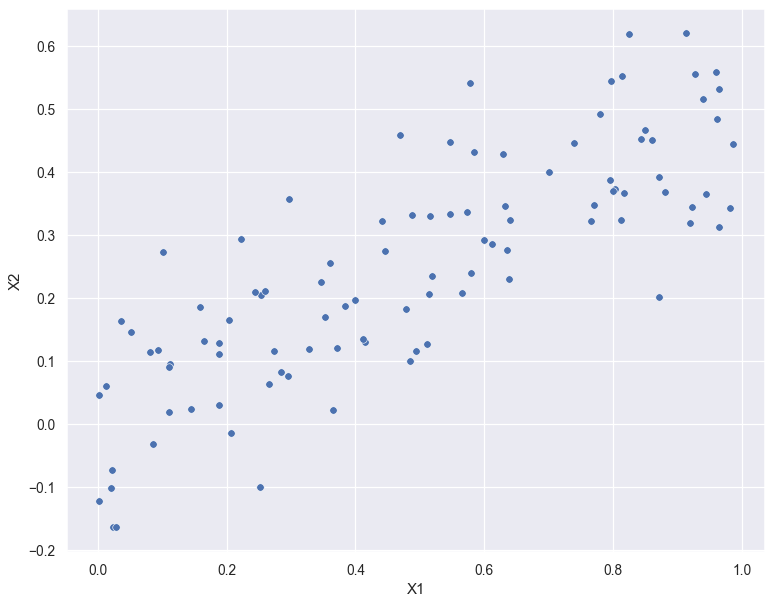

In [79]:
sns.scatterplot(x=data['X1'], y=data['X2'])

#### we can see the newly added data point is an outlier, is separately located from the others.

In [80]:
result = smf.ols('y~X1 + X2',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     38.74
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           4.31e-13
Time:                        23:37:55   Log-Likelihood:                -123.67
No. Observations:                 100   AIC:                             253.3
Df Residuals:                      97   BIC:                             261.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8158      0.162     11.231      0.0

In [81]:
result = smf.ols('y~X1',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     76.72
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           5.93e-14
Time:                        23:38:04   Log-Likelihood:                -124.11
No. Observations:                 100   AIC:                             252.2
Df Residuals:                      98   BIC:                             257.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8229      0.161     11.295      0.0

<AxesSubplot:xlabel='X1', ylabel='y'>

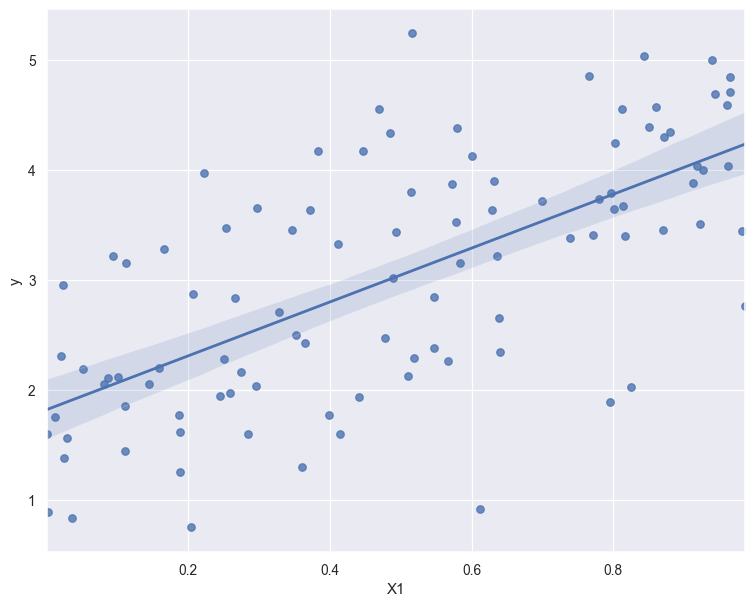

In [82]:
sns.regplot(x=data['X1'], y=data['y'])
# in this case, the point is 'outlier, since it has a very high value of y'

In [83]:
result = smf.ols('y ~ X2',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     50.53
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           1.92e-10
Time:                        23:38:33   Log-Likelihood:                -132.23
No. Observations:                 100   AIC:                             268.5
Df Residuals:                      98   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1250      0.157     13.572      0.0

<AxesSubplot:xlabel='X2', ylabel='y'>

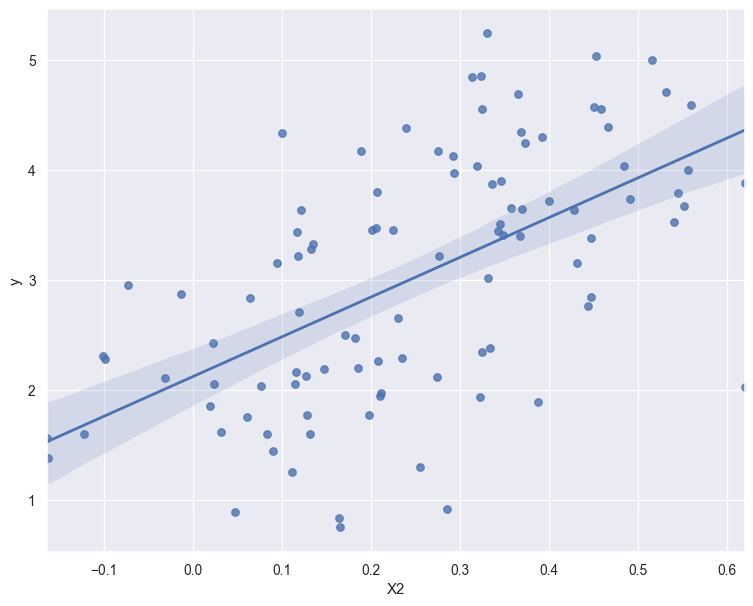

In [84]:
sns.regplot(x=data['X2'], y=data['y'])
# in this case, the righmost point tends to follow the general trend, but is far away from the distribtuion, 
# so, it is a high leverage point

## 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors

In [86]:
from sklearn.datasets import load_boston

boston_data = load_boston()
data = pd.DataFrame(data = boston_data['data'],columns = boston_data['feature_names'])
print(data.shape)
print("---------------")
data.head()

(506, 13)
---------------


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor

ZN    -0.0739  0.0000
---------------------------------


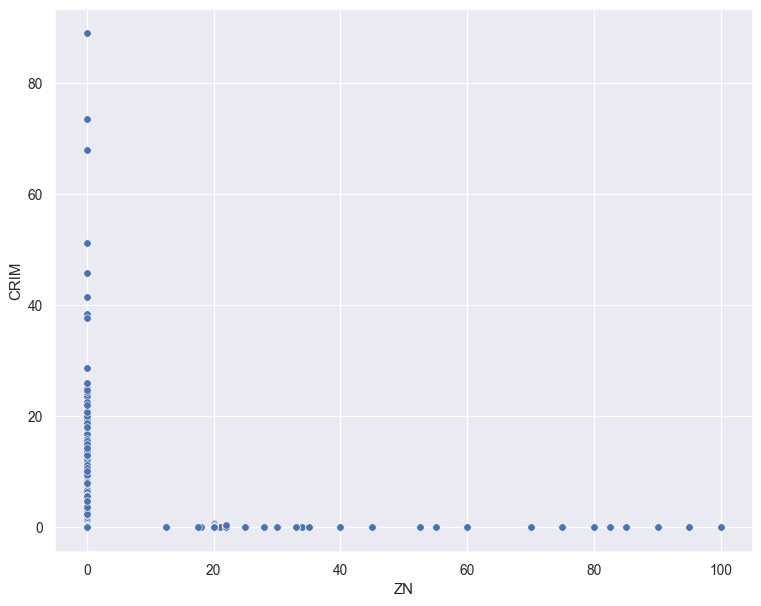

INDUS    0.5098  0.0000
---------------------------------


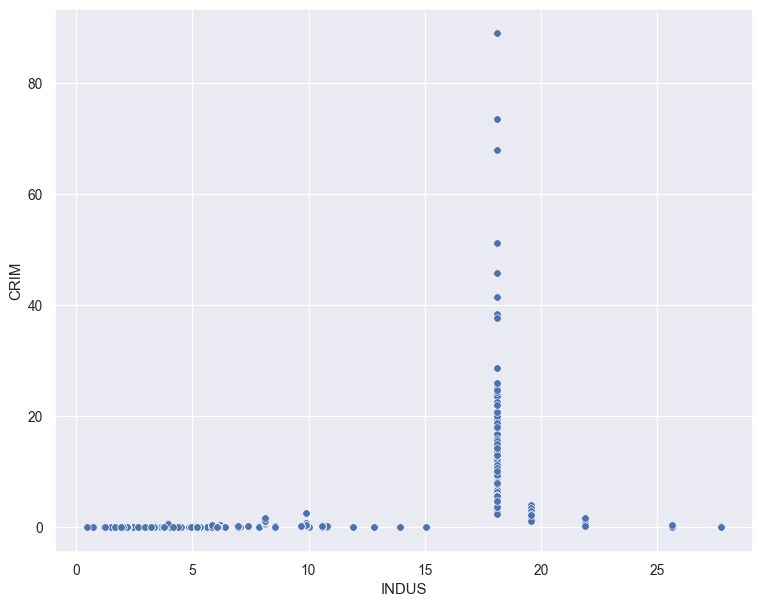

CHAS    -1.8928  0.2094
---------------------------------


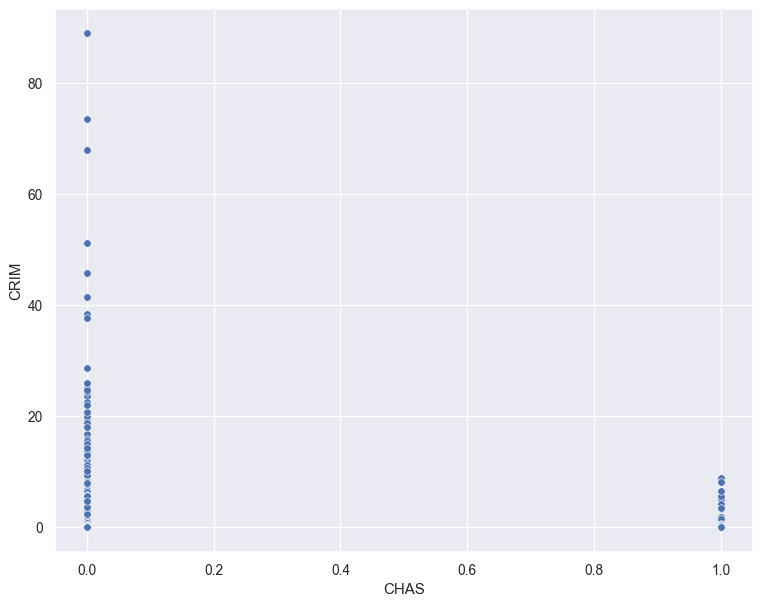

NOX    31.2485  0.0000
---------------------------------


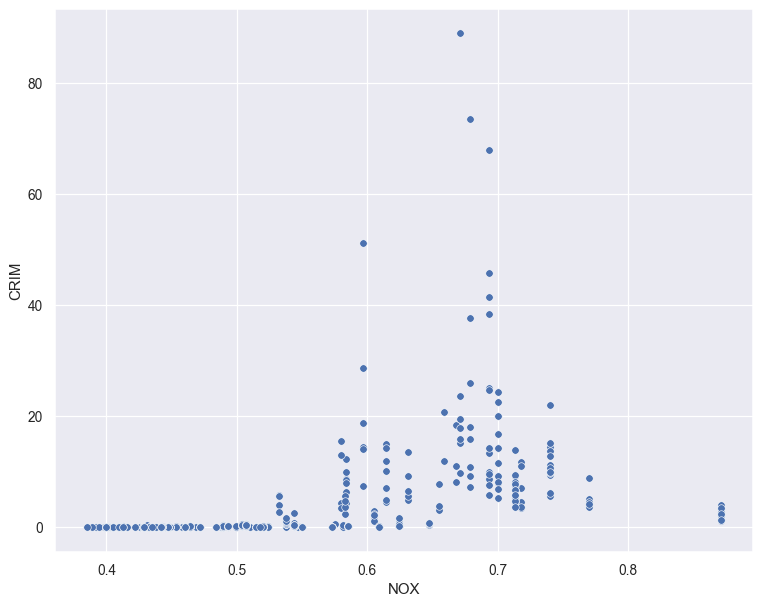

RM    -2.6841  0.0000
---------------------------------


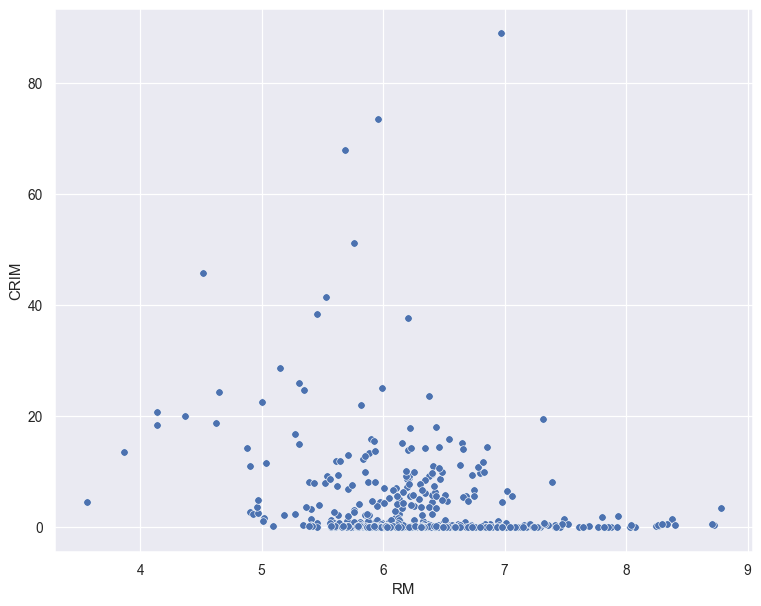

AGE    0.1078  0.0000
---------------------------------


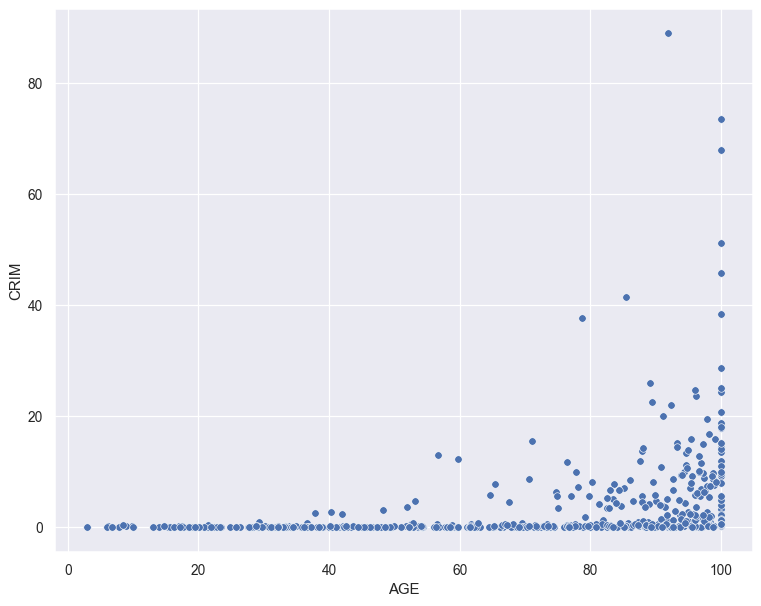

DIS    -1.5509  0.0000
---------------------------------


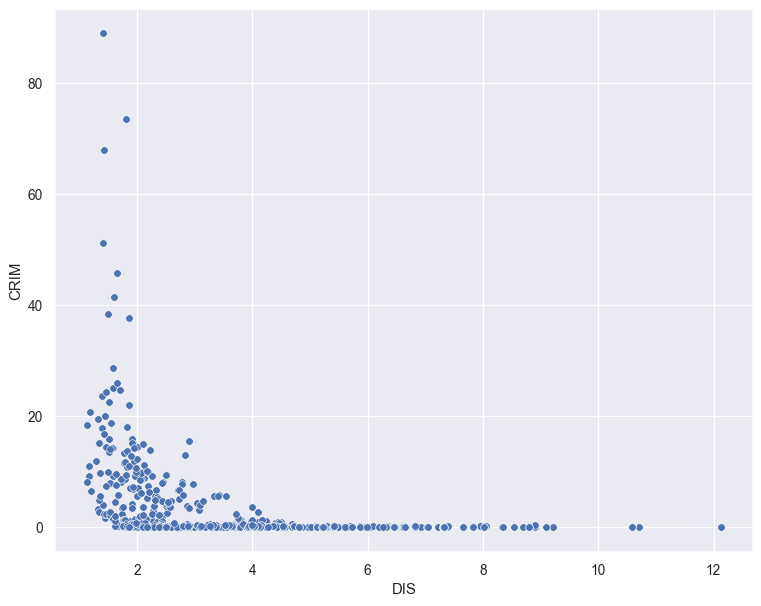

RAD    0.6179  0.0000
---------------------------------


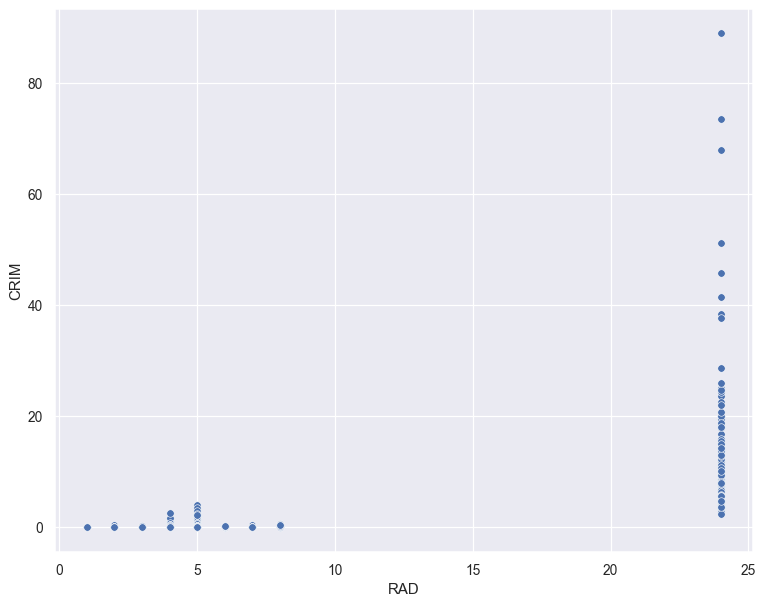

TAX    0.0297  0.0000
---------------------------------


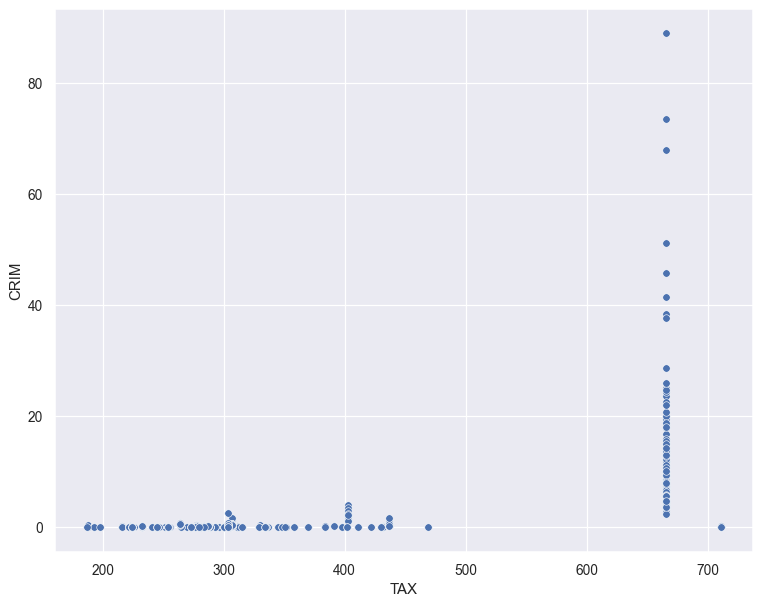

PTRATIO    1.1520  0.0000
---------------------------------


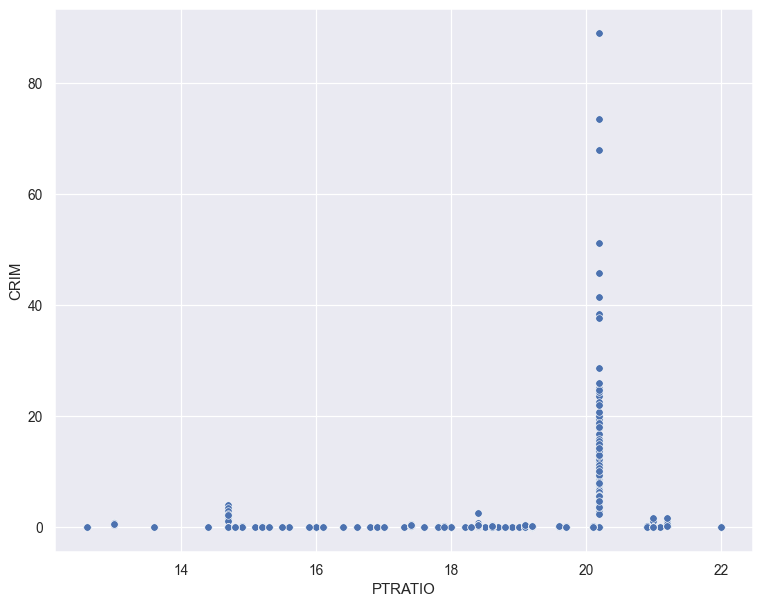

B    -0.0363  0.0000
---------------------------------


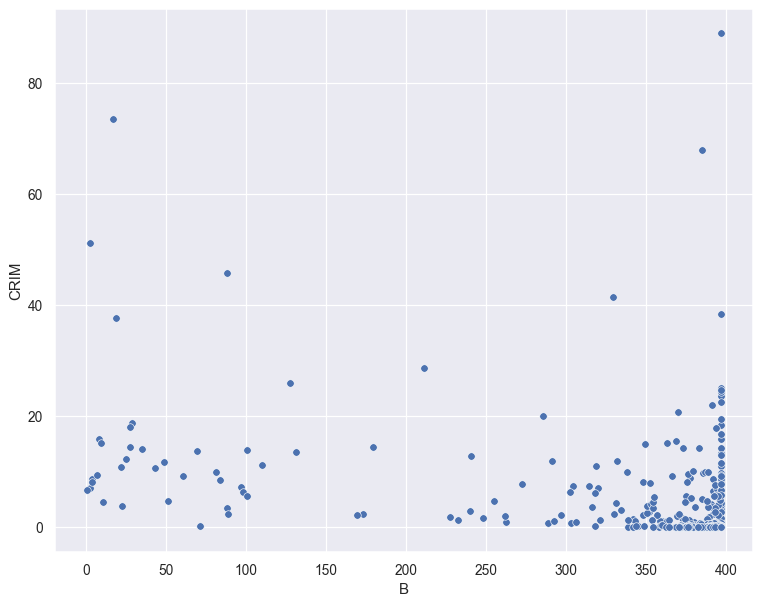

LSTAT    0.5488  0.0000
---------------------------------


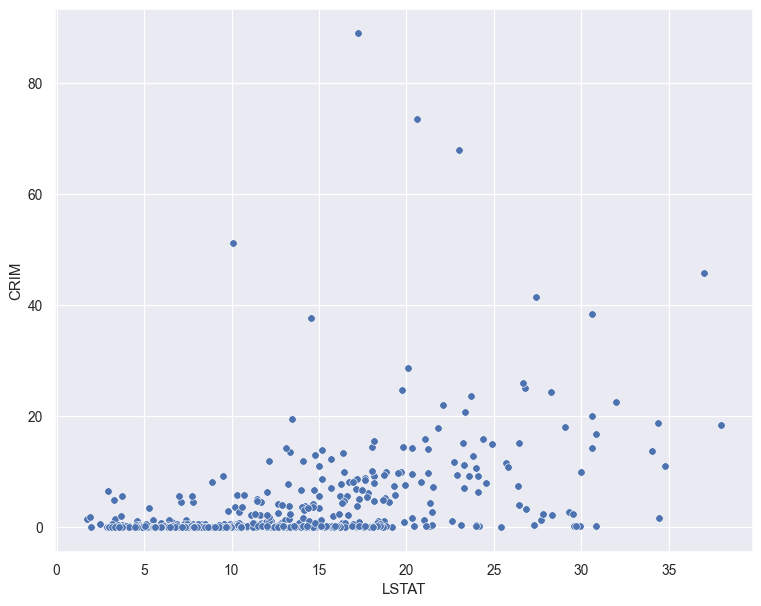

In [90]:
simple_coeff = []
predictor = [col for col in data.columns if col != 'CRIM']
for col in predictor:
  result = smf.ols('CRIM ~ {}'.format(col),data = data).fit()
  print('{}    {:.4f}  {:.4f}'.format(col,result.params[col],result.pvalues[col]))
  print("---------------------------------")
  simple_coeff.append(result.params[col])
  sns.scatterplot(x=data[col], y=data['CRIM'])
  plt.show()

#### from aboce point, we can conclude that every predictor except CHAS, has a significant relation with CRIM.

### (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [91]:
sum_predictor = ' + '.join(predictor)
result = smf.ols('CRIM ~ {}'.format(sum_predictor),data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     32.55
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           4.84e-55
Time:                        23:41:08   Log-Likelihood:                -1658.8
No. Observations:                 506   AIC:                             3344.
Df Residuals:                     493   BIC:                             3398.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9967      6.979      1.432      0.1

#### although the coeff are all non zero, but inspecting the p values, we can only reject null hypothesis of RAD,DIS and LSTAT

### (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis.

<AxesSubplot:>

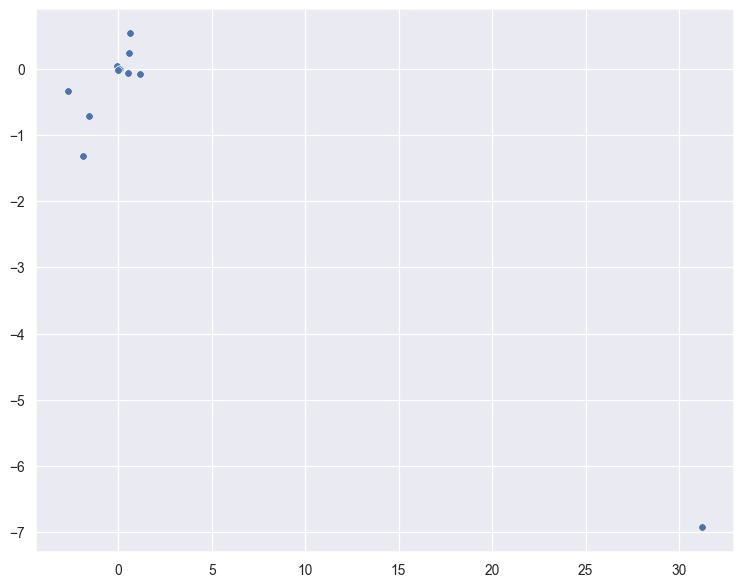

In [92]:
multi_coeff = [result.params[col] for col in predictor]

sns.scatterplot(x=simple_coeff, y=multi_coeff)

In [97]:
# removing the outlier point for NOX
# simple_coeff.remove(31.24853120112292)
# multi_coeff.remove(-6.928835572793048)

(-7.302223171675458, 32.945160322384766)

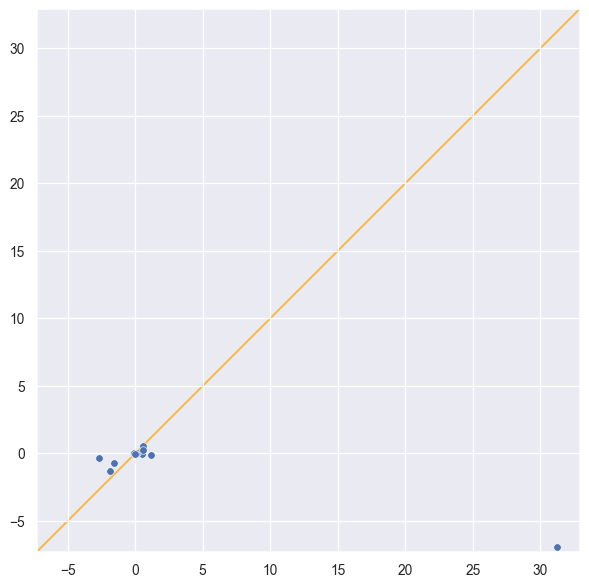

In [98]:
fig, ax = plt.subplots()
sns.scatterplot(x=simple_coeff, y=multi_coeff)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
       ]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,color = 'orange')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

### (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y = β0 + β1X + β2X2 + β3X3 + epsilon

In [99]:
for col in predictor:
  print(col)
  result = smf.ols('CRIM ~ {0} + np.power({0},2) + np.power({0},3)'.format(col),data = data).fit()
  print(result.summary())
  print()
  print('--------------------------------------------------------------------------------------------')
  print()

ZN
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           1.28e-06
Time:                        23:44:50   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433  